# <a id = 'section4'> 4. Feature Engineering </font> </a>

#### We have covered some part feature engineering in the precprocessing section where we introduced the weather lag features.These variable adds to a total of 56 new variables.

### 4.1 Five New Features from Stripping timestamps into its components 

 We convert the given time stamps into year, month, weeekday, day & hour

In [41]:
final_xtr["timestamp"] = pd.to_datetime(final_xtr["timestamp"])
final_xtr["year"] = final_xtr["timestamp"].dt.year
final_xtr["month"] = final_xtr["timestamp"].dt.month
final_xtr["weekend"] = final_xtr["timestamp"].dt.weekday
final_xtr["day"] = final_xtr["timestamp"].dt.day
final_xtr["hour"] = final_xtr["timestamp"].dt.hour
print ('Shape of Training : ', final_xtr.shape)
final_xtr.head()

Shape of Training :  (1901988, 79)


,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,wind_speed_max_lag72,wind_speed_min_lag72,wind_speed_std_lag72,date,meter_reading_log1p,year,month,weekend,day,hour
103,105,0,2016-01-01,23.303600,1,Education,50623,NaN,5.0,3.800781,...,3.099609,3.099609,NaN,2016-01-01,3.190624,2016,1,4,1,0
104,106,0,2016-01-01,0.374600,1,Education,5374,NaN,4.0,3.800781,...,3.099609,3.099609,NaN,2016-01-01,0.318163,2016,1,4,1,0
105,106,3,2016-01-01,0.000000,1,Education,5374,NaN,4.0,3.800781,...,3.099609,3.099609,NaN,2016-01-01,0.000000,2016,1,4,1,0
106,107,0,2016-01-01,175.184006,1,Education,97532,2005.0,10.0,3.800781,...,3.099609,3.099609,NaN,2016-01-01,5.171529,2016,1,4,1,0
107,108,0,2016-01-01,91.265297,1,Education,81580,1913.0,5.0,3.800781,...,3.099609,3.099609,NaN,2016-01-01,4.524668,2016,1,4,1,0


### 4.2 One New Feature from Log Transforming Areas of the Building 

Areas of the building have a very wide range so normalizing them & then using it might work better for  the model.

In [42]:
final_xtr['log_square_feet'] = np.log(final_xtr['square_feet'])

We would have used the age feature of a building as well but as this feature has more than 50% missing values it is not suitable to impute such a large chunk of missing values.

### 4.3 Plotting Correlation Heatmap

### Correlation Heatmaps of Newly generated Weather Related Features

In [41]:
df_corr2 = pd.concat([pd.DataFrame(weather_train_df, columns = ['wind_speed_std_lag3',
       'air_temperature_mean_lag72', 'air_temperature_max_lag72',
       'air_temperature_min_lag72', 'air_temperature_std_lag72',
       'cloud_coverage_mean_lag72', 'cloud_coverage_max_lag72',
       'cloud_coverage_min_lag72', 'cloud_coverage_std_lag72',
       'dew_temperature_mean_lag72', 'dew_temperature_max_lag72',]),
        pd.DataFrame(final_xtr['meter_reading_log1p']).reset_index(drop = True)],axis = 1)

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_corr2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Plot Summary  -  The above plot shows the correlation between the various features we have engineered that are related to weather 

All the above features are for 72 hours of time frame  - 


1.  The air temperature mean lag, max-lag & min lag are indicating high correaltion with a score of 0.97.


2.  The air temperature mean lag also has high correlation with dew temperature mean & max lag of 0.85 and 0.83


3. Cloud coverage mean, max & std too have higher correlation amongst each other with a values of 0.76, 0.74 & 0.68.


4. Dew temperature mean, max too have high correlation amongst each other with a value of 0.95 for both.


5. So from the above plot we can deduce that we would be using only one feature amongst the features which have high correlation scores with each other.

In [38]:
df_corr3 = pd.concat([pd.DataFrame(weather_train_df, columns = ['precip_depth_1_hr_mean_lag72', 'precip_depth_1_hr_max_lag72',
       'precip_depth_1_hr_min_lag72', 'precip_depth_1_hr_std_lag72',
       'sea_level_pressure_mean_lag72', 'sea_level_pressure_max_lag72',
       'sea_level_pressure_min_lag72', 'sea_level_pressure_std_lag72',
       'wind_direction_mean_lag72', 'wind_direction_max_lag72']),
        pd.DataFrame(final_xtr['meter_reading_log1p']).reset_index(drop = True)],axis = 1)

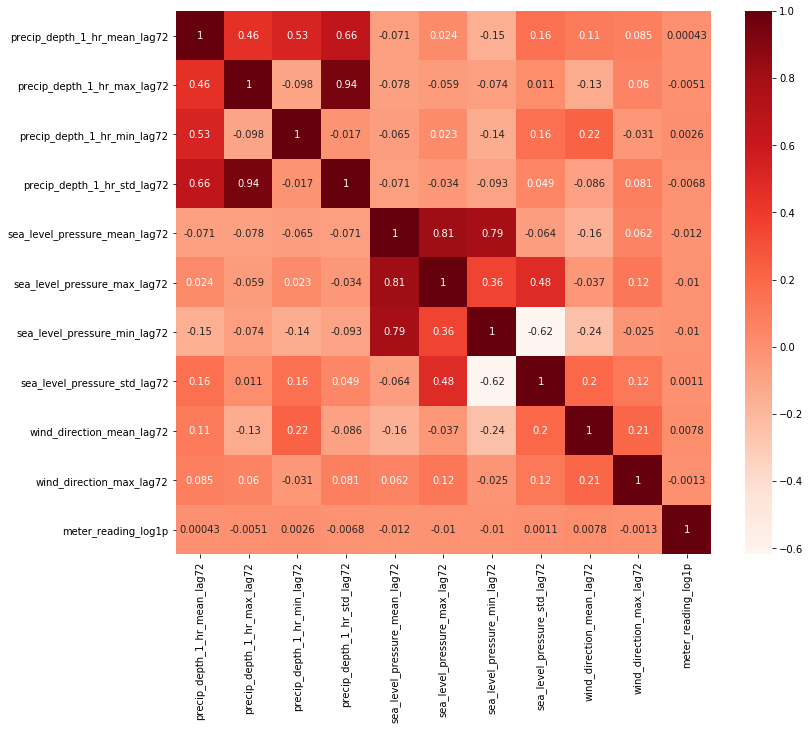

In [39]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_corr3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Plot Summary  -  The above plot shows the correlation between the various features we have engineered that are related to weather 

All the above features are for 72 hours of time frame  - 


1.  The precipitation depth max lag, min lag & std lag are indicating high correaltion with a score of 0.46, 0.53 & 0.66 respectively.


2.  The precipitation depth max lag & std lag also have high correlation with value of 0.94.


3. Sea level pressure mean, min & std too have higher correlation amongst each other with a values of 0.81 & 0.79.


4. So from the above plot we can deduce that we would be using only one feature amongst the features which have high correlation scores with each other.

In [40]:
df_corr4 = pd.concat([pd.DataFrame(weather_train_df, columns = ['wind_direction_min_lag72', 'wind_direction_std_lag72',
       'wind_speed_mean_lag72', 'wind_speed_max_lag72', 'wind_speed_min_lag72',
       'wind_speed_std_lag72']),
        pd.DataFrame(final_xtr['meter_reading_log1p']).reset_index(drop = True)],axis = 1)

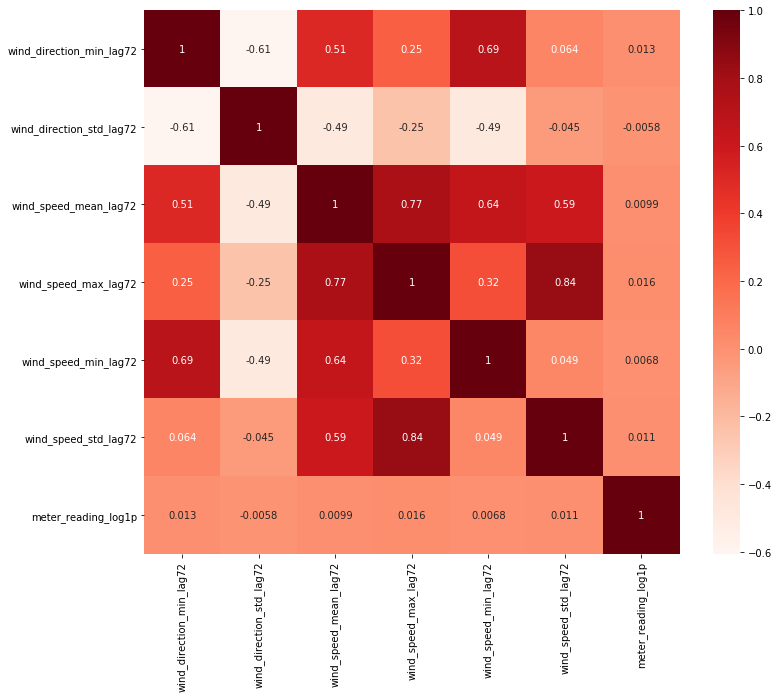

In [41]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_corr4.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Plot Summary  -  The above plot shows the correlation between the various features we have engineered that are related to weather 

All the above features are for 72 hours of time frame  - 


This plot also shows similar patters as we have seen from other previous plots where the min, mean max & std features amongst the same variable show high correlation so we should be using only one of the features from them.

### Correlation Heatmap of newly generated timestamp features & log transformed features

In [42]:
df_corr5 = pd.DataFrame(final_xtr, columns = ['year', 'month', 'weekend'
                                                           'day', 'hour', 'log_square_feet', 'meter_reading_log1p'])

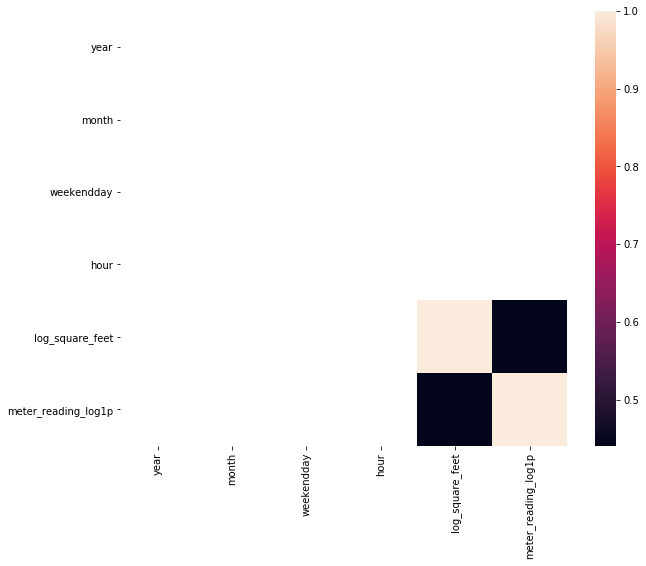

In [43]:
#Using Pearson Correlation
plt.figure(figsize=(10,8))
cor = df_corr5.corr()
sns.heatmap(cor)
plt.show()

Plot Summary  -  The above plot shows the correlation between the various features we have engineered that are related to building features :-


1. Engineered Features related to buildings show much lesser correlation to other features.


2. Month features shows zero correlation with other features.


3. Hour feature show zero correlation with other features.


4. Only the log of building area & meter reading show higher correlation than the rest of the features but it is still close to 0.4 so maybe we can use them for our modelling.

### Correlation Heatmap of Originally provided Features

In [44]:
df_corr6 = pd.concat([pd.DataFrame(final_xtr, columns = ['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built'
                                                         ]),
        pd.DataFrame(weather_train_df, columns = ['timestamp', 'air_temperature', 'cloud_coverage',
                                                 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
                                                 'wind_direction', 'wind_speed']),
        pd.DataFrame(final_xtr, columns = ['meter']),
        pd.DataFrame(final_xtr['meter_reading_log1p']).reset_index(drop = True)],axis = 1)

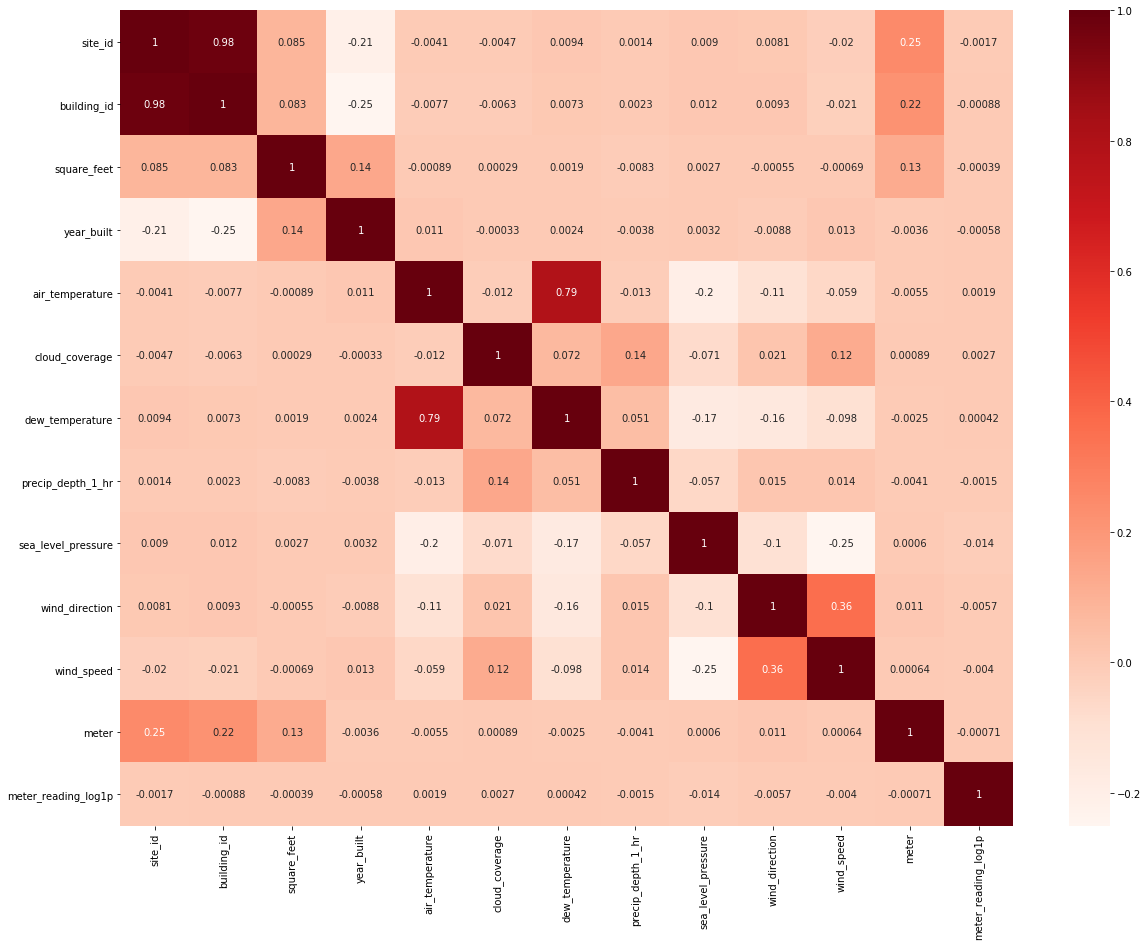

In [45]:
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = df_corr6.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Plot Summary  -  The above plot shows the correlation between the various features that were originally present in the dataset   :-


1. Site ID & building ID are indicating very high correlation with each other with a score of 0.98.


2. Site ID & meter type also show some correlation with a value of 0.24. 


3. Air temperature & dew temperature has high correlation with each other with a score of 0.79.


4. Wind directionn & wind speed show some correlation with each other with a value of 0.36.


5. Wind Speed & cloud coverage also have some correlation with a score of 0.12.


6. After observing the above plot we will be using features which are less correlated with each other.

### 4.4 Steps followed for Feature Engineering :-

1. We considered that there would be a lag in the weather related features which would affect the current temperature. So we used all the weather related features & fond the 3 hours lag & 72 hours lag of the same. This contributed to a total of 56 new features.


2. We broke timestamp into its componenets & obtainewd 5 new features from it.


3. We took log of the building area as the areas of the building were widely spread across various values. THis would help us in greatly normalising these values. 


4. Then we found the correlation amongst all the newly engineered featues & the originally provided features in the dataset.


5. We plotted various heatmaps to show the correlation betweena all the newly generated & the original features.


6. If two features showed high correlation with each other we removed one amongst them. 

### 4.5 Inferences from Feature Engineering : -

1. The weather engineered data had features which mincluded mean, max, min, std values of the same features.These features showed high correlation with each other so we just used one of them in further modelling.


2. The temperature feature of different types e.g air temperature & dew temperature also show high correlation with each other.


3. The features generated from timestamps show very little to no correlation with the target variable & each other.


4. The features provided in the original dataset show higher correlation amongst the following features - 

    i) Site ID & Building ID

    ii) Air Temperature & Dew Temperature



# <a id = 'section1'> 5. Preparing Train & Test data for Modelling </font> </a>

### 5.1 Dropping columns which have too many missing values & high correlation

In [43]:
# Dropping columna with high missing values & which are not so useful
final_xtr.drop(columns=["timestamp","year_built","floor_count","date"], inplace=True)
final_xtr.reset_index(drop = True, inplace = True)

In [44]:
# Dropping all the engineered weather features with high correlation
final_xtr.drop(columns=['air_temperature_max_lag72', 'air_temperature_min_lag72', 
        'air_temperature_std_lag72', 'cloud_coverage_std_lag72',
        'cloud_coverage_max_lag72', 'cloud_coverage_min_lag72', 
       'dew_temperature_mean_lag72', 'dew_temperature_max_lag72',
       'dew_temperature_std_lag72', 'precip_depth_1_hr_max_lag72',
       'precip_depth_1_hr_min_lag72', 'precip_depth_1_hr_std_lag72',
       'sea_level_pressure_max_lag72', 'sea_level_pressure_min_lag72',
       'wind_direction_min_lag72', 'wind_direction_std_lag72',
       'wind_speed_mean_lag72', 'air_temperature_max_lag3',
        'air_temperature_min_lag3', 'air_temperature_std_lag3', 
        'cloud_coverage_std_lag3', 'cloud_coverage_max_lag3', 
        'cloud_coverage_min_lag3', 'dew_temperature_mean_lag3', 
        'dew_temperature_max_lag3','dew_temperature_std_lag3',
        'precip_depth_1_hr_max_lag3','precip_depth_1_hr_min_lag3', 
        'precip_depth_1_hr_std_lag3','sea_level_pressure_max_lag3',
        'sea_level_pressure_min_lag3','wind_direction_min_lag3', 
        'wind_direction_std_lag3','wind_speed_mean_lag3' ], inplace=True)
final_xtr.reset_index(drop = True, inplace = True)

### 5.2  Label encoding Primary use Feature

In [45]:
# Label Encoding primary_use Feature 

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(final_xtr['primary_use'])

final_xtr['primary_use'] = pd.Series(le.transform(final_xtr['primary_use']))

In [46]:
final_xtr = reduce_mem_usg(final_xtr)

Mem. usage decreased to 143.30 Mb (39.2% reduction)


In [47]:
final_xtr.shape

(1901988, 42)

In [48]:
final_xtr.columns

Index(['building_id', 'meter', 'meter_reading', 'site_id', 'primary_use',
       'square_feet', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'air_temperature_mean_lag3', 'cloud_coverage_mean_lag3',
       'dew_temperature_min_lag3', 'precip_depth_1_hr_mean_lag3',
       'sea_level_pressure_mean_lag3', 'sea_level_pressure_std_lag3',
       'wind_direction_mean_lag3', 'wind_direction_max_lag3',
       'wind_speed_max_lag3', 'wind_speed_min_lag3', 'wind_speed_std_lag3',
       'air_temperature_mean_lag72', 'cloud_coverage_mean_lag72',
       'dew_temperature_min_lag72', 'precip_depth_1_hr_mean_lag72',
       'sea_level_pressure_mean_lag72', 'sea_level_pressure_std_lag72',
       'wind_direction_mean_lag72', 'wind_direction_max_lag72',
       'wind_speed_max_lag72', 'wind_speed_min_lag72', 'wind_speed_std_lag72',
       'meter_reading_log1p', 'year', 'month', 'weekend', 'day', 'hour',
      

In [49]:
X = final_xtr

### 5.3 Splitting Train Data into Train & Test Data 

#### The dataset has all the points sorted by date. So we will be preserving the temporal nature of the data & will be  dividing the training set into 70% split for training & 30% split for testing.

In [50]:
X_train_size = int(len(X) * 0.70)
X_train, X_test = X[0:X_train_size], X[X_train_size:len(X)]

In [51]:
print(X_train.shape)
print(X_test.shape)

(1331391, 42)
(570597, 42)


In [52]:
y = final_xtr['meter_reading_log1p']

In [53]:
y_train_size = int(len(y) * 0.70)
y_train, y_test = y[0:y_train_size], y[y_train_size:len(y)]

In [54]:
print(y_train.shape)
print(y_test.shape)

(1331391,)
(570597,)


In [55]:
type(y_train)

pandas.core.series.Series

In [56]:
X_train = X_train.fillna(0)

In [57]:
X_test = X_test.fillna(0)

In [58]:
x_train = X_train.drop(columns=['meter_reading', 'meter_reading_log1p'])
x_test = X_test.drop(columns=['meter_reading', 'meter_reading_log1p'])

In [59]:
print(x_train.shape)
print(x_test.shape)

(1331391, 40)
(570597, 40)


In [60]:
type(y_test)

pandas.core.series.Series

In [61]:
yte = y_test

In [62]:
type(yte)

pandas.core.series.Series

#### Changing  y_test from time series dataframe to normal numpy array 

In [63]:
y_test = y_test.to_frame()

In [64]:
type(y_test)

pandas.core.frame.DataFrame

In [65]:
y_test = y_test.values

In [66]:
type(y_test)

numpy.ndarray

### 5.4 Evaluation Metrics

In [67]:
'''This is a scorer function that will give a RMSLE score to our predictions '''

def rmsle_score(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5